**Author:** Raoul Malm  

**Description:** 

This notebook demonstrates the future price prediction for different stocks using recurrent neural networks in tensorflow. Recurrent neural networks with basic, LSTM or GRU cells are implemented. 

**Outline:**

1. [Libraries and settings](#1-bullet)
2. [Analyze data](#2-bullet)
3. [Manipulate data](#3-bullet)
4. [Model and validate data](#4-bullet)
5. [Predictions](#5-bullet)

**Reference:**  

[LSTM_Stock_prediction-20170507 by BenF](https://www.kaggle.com/benjibb/lstm-stock-prediction-20170507/notebook)

# 1. Libraries and settings <a class="anchor" id="1-bullet"></a> 

In [1]:
import numpy as np
import pandas as pd
import math
import sklearn
import sklearn.preprocessing
import datetime
import os
import matplotlib.pyplot as plt
import tensorflow as tf

# split data in 80%/10%/10% train/validation/test sets
valid_set_size_percentage = 10 
test_set_size_percentage = 10 

#display parent directory and working directory
print(os.path.dirname(os.getcwd())+':', os.listdir(os.path.dirname(os.getcwd())));
print(os.getcwd()+':', os.listdir(os.getcwd()));


/kaggle: ['lib', 'input', 'working']
/kaggle/working: []


This code imports several libraries such as numpy, pandas, math, sklearn, datetime, os, matplotlib.pyplot, and tensorflow. These libraries provide various functionalities for data manipulation, preprocessing, visualization, and machine learning tasks.   The code then sets the sizes of the validation and test sets to 10% each. This means that the data will be split into three parts: 80% for training, 10% for validation, and 10% for testing.  After that, the code prints the parent directory and the working directory along with the contents of each directory. This is done to display the directories and their contents in the console. This can help in verifying that the code is accessing the correct directories and files.  Overall, this code imports necessary libraries, sets the sizes for the validation and test sets, and displays the directories and their contents.

# 2. Analyze data <a class="anchor" id="2-bullet"></a> 
- load stock prices from prices-split-adjusted.csv
- analyze data

In [2]:
# import all stock prices 
df = pd.read_csv("../input/prices-split-adjusted.csv", index_col = 0)
df.info()
df.head()

# number of different stocks
print('\nnumber of different stocks: ', len(list(set(df.symbol))))
print(list(set(df.symbol))[:10])

<class 'pandas.core.frame.DataFrame'>
Index: 851264 entries, 2016-01-05 to 2016-12-30
Data columns (total 6 columns):
symbol    851264 non-null object
open      851264 non-null float64
close     851264 non-null float64
low       851264 non-null float64
high      851264 non-null float64
volume    851264 non-null float64
dtypes: float64(5), object(1)
memory usage: 45.5+ MB

number of different stocks:  501
['ECL', 'WDC', 'EMN', 'NLSN', 'RCL', 'COST', 'PEG', 'CA', 'DISCA', 'STZ']


This code imports stock prices from a CSV file and stores them in a Pandas DataFrame. The CSV file, named "prices-split-adjusted.csv," is accessed using a relative path and the read_csv function from the pandas library. The DataFrame's information, such as the number of rows and column data types, is then printed using the info() method. The first few rows of the DataFrame are displayed using the head() method.  The code also calculates and prints the number of different stocks within the DataFrame. It does this by first extracting the unique symbols from the 'symbol' column and converting them into a set to remove any duplicates. The length of this set is then printed to determine the number of distinct stocks. Additionally, it prints the first ten unique symbols in the DataFrame to provide a brief sample of the stocks included.

In [3]:
df.tail()

symbol        open       close         low        high     volume
date                                                                        
2016-12-30    ZBH  103.309998  103.199997  102.849998  103.930000   973800.0
2016-12-30   ZION   43.070000   43.040001   42.689999   43.310001  1938100.0
2016-12-30    ZTS   53.639999   53.529999   53.270000   53.740002  1701200.0
2016-12-30    AIV   44.730000   45.450001   44.410000   45.590000  1380900.0
2016-12-30    FTV   54.200001   53.630001   53.389999   54.480000   705100.0

The code `df.tail()` is used to retrieve the last few rows of a DataFrame called `df`. A DataFrame is a two-dimensional tabular data structure in pandas. By default, the `tail()` method returns the last five rows of the DataFrame.   This code is commonly used to inspect the end of the DataFrame and get a quick overview of the dataset. It is helpful to verify the data consistency, check for any anomalies, or simply get a glimpse of the recent entries. The `tail()` method is particularly useful when dealing with large datasets, as it allows users to peek at the bottom rows without loading the entire DataFrame into memory.  The resulting output of `df.tail()` will display the last few rows of the DataFrame with their corresponding column values. Each row will be indexed, providing a reference to easily locate the specific rows and observe the associated data.

In [4]:
df.describe()

open          close            low           high  \
count  851264.000000  851264.000000  851264.000000  851264.000000   
mean       64.993618      65.011913      64.336541      65.639748   
std        75.203893      75.201216      74.459518      75.906861   
min         1.660000       1.590000       1.500000       1.810000   
25%        31.270000      31.292776      30.940001      31.620001   
50%        48.459999      48.480000      47.970001      48.959999   
75%        75.120003      75.139999      74.400002      75.849998   
max      1584.439941    1578.130005    1549.939941    1600.930054   

             volume  
count  8.512640e+05  
mean   5.415113e+06  
std    1.249468e+07  
min    0.000000e+00  
25%    1.221500e+06  
50%    2.476250e+06  
75%    5.222500e+06  
max    8.596434e+08

The code `df.describe()` is used to generate descriptive statistics of a DataFrame in Python.   When applied to a DataFrame object (denoted by `df`), this code will compute various statistical measures for each column in the DataFrame. These measures include count, mean, standard deviation, minimum value, 25th percentile, median (50th percentile), 75th percentile, and maximum value.  The `describe()` function is particularly useful for gaining a quick insight into the distribution and summary statistics of the data. It can provide information such as the data range, central tendency, and variability of each numerical column in the DataFrame.  By calling `df.describe()`, the user can easily obtain a concise summary of the DataFrame's numerical data, allowing them to identify potential outliers, understand the data spread, and make initial assessments of data quality or patterns.  Overall, `df.describe()` is a powerful tool for data exploration, providing summary statistics for each column of a DataFrame,
thereby enabling the user to quickly understand the data characteristics and make informed decisions during the data analysis process.

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 851264 entries, 2016-01-05 to 2016-12-30
Data columns (total 6 columns):
symbol    851264 non-null object
open      851264 non-null float64
close     851264 non-null float64
low       851264 non-null float64
high      851264 non-null float64
volume    851264 non-null float64
dtypes: float64(5), object(1)
memory usage: 45.5+ MB


The code "df.info()" is used to retrieve and display information about a DataFrame object called "df". This method provides a summary of the DataFrame's structure and content. It includes details such as the number of rows, columns, and the type of data stored in each column.  When executed, this code will output a concise summary of the DataFrame's metadata. This includes the column names, the number of non-null values in each column, as well as the data type of each column. Additionally, it may display information about memory usage.  This can be useful for data exploration and data cleaning tasks, as it provides an overview of the DataFrame's structure, allowing the user to quickly identify missing values, inconsistencies, or potential data quality issues. It helps users gain insight into the data and make informed decisions about how to handle or manipulate it.

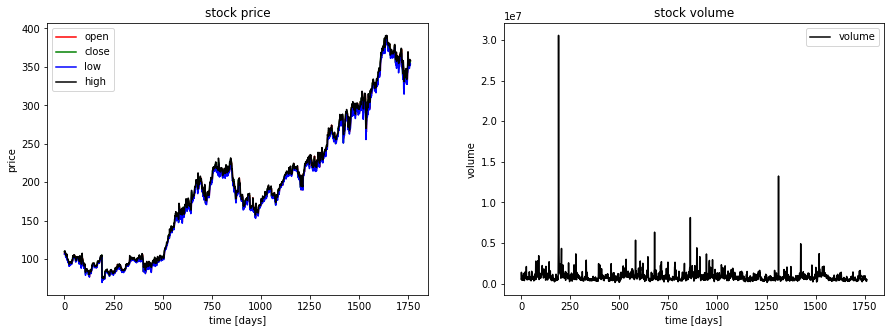

In [6]:
plt.figure(figsize=(15, 5));
plt.subplot(1,2,1);
plt.plot(df[df.symbol == 'EQIX'].open.values, color='red', label='open')
plt.plot(df[df.symbol == 'EQIX'].close.values, color='green', label='close')
plt.plot(df[df.symbol == 'EQIX'].low.values, color='blue', label='low')
plt.plot(df[df.symbol == 'EQIX'].high.values, color='black', label='high')
plt.title('stock price')
plt.xlabel('time [days]')
plt.ylabel('price')
plt.legend(loc='best')
#plt.show()

plt.subplot(1,2,2);
plt.plot(df[df.symbol == 'EQIX'].volume.values, color='black', label='volume')
plt.title('stock volume')
plt.xlabel('time [days]')
plt.ylabel('volume')
plt.legend(loc='best');

This code is using the matplotlib library to create a figure with two subplots. In the first subplot, it plots the open, close, low, and high prices of a particular stock (symbol 'EQIX') using different colors for each line. It also adds labels and a title to the plot, as well as a legend to indicate which color corresponds to which price.   In the second subplot, it plots the volume of the same stock using a black line. It also adds labels and a title to this plot, as well as a legend.   Overall, this code is used to visualize the price and volume data of a stock over time, with the goal of providing a clear representation of how the stock has been performing.

# 3. Manipulate data <a class="anchor" id="3-bullet"></a> 
- choose a specific stock
- drop feature: volume
- normalize stock data
- create train, validation and test data sets

In [7]:
# function for min-max normalization of stock
def normalize_data(df):
    min_max_scaler = sklearn.preprocessing.MinMaxScaler()
    df['open'] = min_max_scaler.fit_transform(df.open.values.reshape(-1,1))
    df['high'] = min_max_scaler.fit_transform(df.high.values.reshape(-1,1))
    df['low'] = min_max_scaler.fit_transform(df.low.values.reshape(-1,1))
    df['close'] = min_max_scaler.fit_transform(df['close'].values.reshape(-1,1))
    return df

# function to create train, validation, test data given stock data and sequence length
def load_data(stock, seq_len):
    data_raw = stock.as_matrix() # convert to numpy array
    data = []
    
    # create all possible sequences of length seq_len
    for index in range(len(data_raw) - seq_len): 
        data.append(data_raw[index: index + seq_len])
    
    data = np.array(data);
    valid_set_size = int(np.round(valid_set_size_percentage/100*data.shape[0]));  
    test_set_size = int(np.round(test_set_size_percentage/100*data.shape[0]));
    train_set_size = data.shape[0] - (valid_set_size + test_set_size);
    
    x_train = data[:train_set_size,:-1,:]
    y_train = data[:train_set_size,-1,:]
    
    x_valid = data[train_set_size:train_set_size+valid_set_size,:-1,:]
    y_valid = data[train_set_size:train_set_size+valid_set_size,-1,:]
    
    x_test = data[train_set_size+valid_set_size:,:-1,:]
    y_test = data[train_set_size+valid_set_size:,-1,:]
    
    return [x_train, y_train, x_valid, y_valid, x_test, y_test]

# choose one stock
df_stock = df[df.symbol == 'EQIX'].copy()
df_stock.drop(['symbol'],1,inplace=True)
df_stock.drop(['volume'],1,inplace=True)

cols = list(df_stock.columns.values)
print('df_stock.columns.values = ', cols)

# normalize stock
df_stock_norm = df_stock.copy()
df_stock_norm = normalize_data(df_stock_norm)

# create train, test data
seq_len = 20 # choose sequence length
x_train, y_train, x_valid, y_valid, x_test, y_test = load_data(df_stock_norm, seq_len)
print('x_train.shape = ',x_train.shape)
print('y_train.shape = ', y_train.shape)
print('x_valid.shape = ',x_valid.shape)
print('y_valid.shape = ', y_valid.shape)
print('x_test.shape = ', x_test.shape)
print('y_test.shape = ',y_test.shape)


df_stock.columns.values =  ['open', 'close', 'low', 'high']
x_train.shape =  (1394, 19, 4)
y_train.shape =  (1394, 4)
x_valid.shape =  (174, 19, 4)
y_valid.shape =  (174, 4)
x_test.shape =  (174, 19, 4)
y_test.shape =  (174, 4)


This code performs various operations related to stock data.   The function `normalize_data` takes a DataFrame `df` as input and applies min-max normalization to the columns 'open', 'high', 'low', and 'close'. It uses the `sklearn.preprocessing.MinMaxScaler()` function to scale the values between 0 and 1. It then returns the modified DataFrame.  The function `load_data` takes a stock data and sequence length as input. It converts the stock data into a numpy array and creates all possible sequences of length `seq_len` from the data. It splits the data into train, validation, and test sets based on set size percentages. It returns separate arrays for input features and output targets for the train, validation, and test sets.  The code chooses a specific stock ('EQIX') from the DataFrame `df` and drops columns 'symbol' and 'volume' from it. It prints the column names of the modified DataFrame.  It then creates a normalized copy of the stock data by calling the `normalize_data` function.   Finally, it creates train, validation, and test data sets by calling the `load_data` function and passing the normalized stock data and a sequence length. It prints the shapes of the created arrays for the train, validation, and test sets.

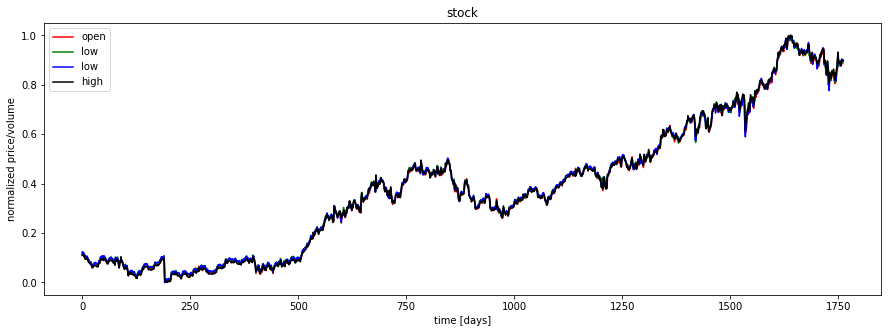

In [8]:
plt.figure(figsize=(15, 5));
plt.plot(df_stock_norm.open.values, color='red', label='open')
plt.plot(df_stock_norm.close.values, color='green', label='low')
plt.plot(df_stock_norm.low.values, color='blue', label='low')
plt.plot(df_stock_norm.high.values, color='black', label='high')
#plt.plot(df_stock_norm.volume.values, color='gray', label='volume')
plt.title('stock')
plt.xlabel('time [days]')
plt.ylabel('normalized price/volume')
plt.legend(loc='best')
plt.show()

This code is using the matplotlib library in Python to create a line plot of stock data. It sets the size of the figure, then plots the normalized opening, closing, low, and high prices of the stock on the same graph, each with a different color and labeled accordingly. The volume of the stock is commented out, indicating that it is not currently being plotted. The title, x-axis label, and y-axis label are set, and a legend is added to the graph. Finally, the graph is displayed to the user.

# 4. Model and validate data <a class="anchor" id="4-bullet"></a> 
- RNNs with basic, LSTM, GRU cells


In [9]:
## Basic Cell RNN in tensorflow

index_in_epoch = 0;
perm_array  = np.arange(x_train.shape[0])
np.random.shuffle(perm_array)

# function to get the next batch
def get_next_batch(batch_size):
    global index_in_epoch, x_train, perm_array   
    start = index_in_epoch
    index_in_epoch += batch_size
    
    if index_in_epoch > x_train.shape[0]:
        np.random.shuffle(perm_array) # shuffle permutation array
        start = 0 # start next epoch
        index_in_epoch = batch_size
        
    end = index_in_epoch
    return x_train[perm_array[start:end]], y_train[perm_array[start:end]]

# parameters
n_steps = seq_len-1 
n_inputs = 4 
n_neurons = 200 
n_outputs = 4
n_layers = 2
learning_rate = 0.001
batch_size = 50
n_epochs = 100 
train_set_size = x_train.shape[0]
test_set_size = x_test.shape[0]

tf.reset_default_graph()

X = tf.placeholder(tf.float32, [None, n_steps, n_inputs])
y = tf.placeholder(tf.float32, [None, n_outputs])

# use Basic RNN Cell
layers = [tf.contrib.rnn.BasicRNNCell(num_units=n_neurons, activation=tf.nn.elu)
          for layer in range(n_layers)]


multi_layer_cell = tf.contrib.rnn.MultiRNNCell(layers)
rnn_outputs, states = tf.nn.dynamic_rnn(multi_layer_cell, X, dtype=tf.float32)

stacked_rnn_outputs = tf.reshape(rnn_outputs, [-1, n_neurons]) 
stacked_outputs = tf.layers.dense(stacked_rnn_outputs, n_outputs)
outputs = tf.reshape(stacked_outputs, [-1, n_steps, n_outputs])
outputs = outputs[:,n_steps-1,:] # keep only last output of sequence
                                              
loss = tf.reduce_mean(tf.square(outputs - y)) # loss function = mean squared error 
optimizer = tf.train.AdamOptimizer(learning_rate=learning_rate) 
training_op = optimizer.minimize(loss)
                                              
# run graph
with tf.Session() as sess: 
    sess.run(tf.global_variables_initializer())
    for iteration in range(int(n_epochs*train_set_size/batch_size)):
        x_batch, y_batch = get_next_batch(batch_size) # fetch the next training batch 
        sess.run(training_op, feed_dict={X: x_batch, y: y_batch}) 
        if iteration % int(5*train_set_size/batch_size) == 0:
            mse_train = loss.eval(feed_dict={X: x_train, y: y_train}) 
            mse_valid = loss.eval(feed_dict={X: x_valid, y: y_valid}) 
            print('%.2f epochs: MSE train/valid = %.6f/%.6f'%(
                iteration*batch_size/train_set_size, mse_train, mse_valid))

    y_train_pred = sess.run(outputs, feed_dict={X: x_train})
    y_valid_pred = sess.run(outputs, feed_dict={X: x_valid})
    y_test_pred = sess.run(outputs, feed_dict={X: x_test})
    

0.00 epochs: MSE train/valid = 0.044422/0.100171
4.99 epochs: MSE train/valid = 0.000188/0.000581
9.97 epochs: MSE train/valid = 0.000142/0.000542
14.96 epochs: MSE train/valid = 0.000227/0.001115
19.94 epochs: MSE train/valid = 0.000133/0.000674
24.93 epochs: MSE train/valid = 0.000167/0.000843
29.91 epochs: MSE train/valid = 0.000103/0.000408
34.90 epochs: MSE train/valid = 0.000089/0.000345
39.89 epochs: MSE train/valid = 0.000090/0.000292
44.87 epochs: MSE train/valid = 0.000102/0.000293
49.86 epochs: MSE train/valid = 0.000079/0.000337
54.84 epochs: MSE train/valid = 0.000078/0.000297
59.83 epochs: MSE train/valid = 0.000080/0.000324
64.81 epochs: MSE train/valid = 0.000073/0.000249
69.80 epochs: MSE train/valid = 0.000091/0.000284
74.78 epochs: MSE train/valid = 0.000065/0.000257
79.77 epochs: MSE train/valid = 0.000087/0.000234
84.76 epochs: MSE train/valid = 0.000075/0.000310
89.74 epochs: MSE train/valid = 0.000073/0.000202
94.73 epochs: MSE train/valid = 0.000085/0.000263
99.

This code is a basic implementation of a Recurrent Neural Network (RNN) using the TensorFlow library.   The code begins by shuffling the training data and defining a function, `get_next_batch()`, that retrieves the next batch of training examples. This function updates the global variable `index_in_epoch` to keep track of the current position in the training data.  Next, various parameters are defined, including the number of time steps in the RNN, the number of inputs and outputs, the number of neurons in each layer, the learning rate, and the batch size.   The TensorFlow graph is then constructed, starting with placeholder nodes for the input `X` and output `y`. The code uses the `BasicRNNCell` from TensorFlow's RNN module to create multiple layers of RNN cells. The `MultiRNNCell` is used to stack these layers. The RNN cells are then connected to the input placeholder `X` using the `dynamic_rnn` function, which performs the actual forward pass through the RNN.   The hidden outputs of the RNN are reshaped and passed through a fully connected layer using the `dense` function from TensorFlow's layers module. The final output is reshaped to have the same shape as the input and only the final output of each sequence is retained.   The loss function is defined as the mean squared error between the predicted outputs and the true outputs. An Adam optimizer is used to minimize this loss function.   After the graph is constructed, a TensorFlow session is created and all variables are initialized. The training loop then iterates over the number of epochs, fetching the next batch of training data and running the `training_op` to perform a gradient descent step. Every few iterations, the mean squared error is evaluated on both the training and validation sets and printed to the console.   Once training is complete, the code uses the trained model to make predictions on the training, validation, and test sets.

# 5. Predictions <a class="anchor" id="5-bullet"></a> 

In [10]:
y_train.shape

(1394, 4)

The code in question is performing an operation on the variable "y_train".  "y_train" is likely a variable containing the labels or target values of a training dataset. The ".shape" is a method used in Python to determine the dimensions of an array or matrix.   By invoking the ".shape" method on "y_train", the code retrieves information about the shape or structure of the "y_train" variable. This information typically includes the number of elements in each dimension of the array.   The result obtained from this code will provide insights into the size and structure of "y_train", allowing further analysis or manipulation of the data. For example, the shape information can be useful in understanding the distribution of the labels or in determining compatibility with other arrays or operations.

correct sign prediction for close - open price for train/valid/test: 0.75/0.64/0.61


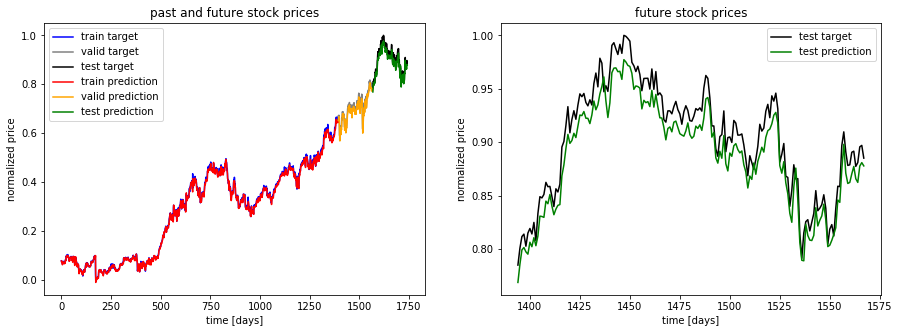

In [11]:
ft = 0 # 0 = open, 1 = close, 2 = highest, 3 = lowest

## show predictions
plt.figure(figsize=(15, 5));
plt.subplot(1,2,1);

plt.plot(np.arange(y_train.shape[0]), y_train[:,ft], color='blue', label='train target')

plt.plot(np.arange(y_train.shape[0], y_train.shape[0]+y_valid.shape[0]), y_valid[:,ft],
         color='gray', label='valid target')

plt.plot(np.arange(y_train.shape[0]+y_valid.shape[0],
                   y_train.shape[0]+y_test.shape[0]+y_test.shape[0]),
         y_test[:,ft], color='black', label='test target')

plt.plot(np.arange(y_train_pred.shape[0]),y_train_pred[:,ft], color='red',
         label='train prediction')

plt.plot(np.arange(y_train_pred.shape[0], y_train_pred.shape[0]+y_valid_pred.shape[0]),
         y_valid_pred[:,ft], color='orange', label='valid prediction')

plt.plot(np.arange(y_train_pred.shape[0]+y_valid_pred.shape[0],
                   y_train_pred.shape[0]+y_valid_pred.shape[0]+y_test_pred.shape[0]),
         y_test_pred[:,ft], color='green', label='test prediction')

plt.title('past and future stock prices')
plt.xlabel('time [days]')
plt.ylabel('normalized price')
plt.legend(loc='best');

plt.subplot(1,2,2);

plt.plot(np.arange(y_train.shape[0], y_train.shape[0]+y_test.shape[0]),
         y_test[:,ft], color='black', label='test target')

plt.plot(np.arange(y_train_pred.shape[0], y_train_pred.shape[0]+y_test_pred.shape[0]),
         y_test_pred[:,ft], color='green', label='test prediction')

plt.title('future stock prices')
plt.xlabel('time [days]')
plt.ylabel('normalized price')
plt.legend(loc='best');

corr_price_development_train = np.sum(np.equal(np.sign(y_train[:,1]-y_train[:,0]),
            np.sign(y_train_pred[:,1]-y_train_pred[:,0])).astype(int)) / y_train.shape[0]
corr_price_development_valid = np.sum(np.equal(np.sign(y_valid[:,1]-y_valid[:,0]),
            np.sign(y_valid_pred[:,1]-y_valid_pred[:,0])).astype(int)) / y_valid.shape[0]
corr_price_development_test = np.sum(np.equal(np.sign(y_test[:,1]-y_test[:,0]),
            np.sign(y_test_pred[:,1]-y_test_pred[:,0])).astype(int)) / y_test.shape[0]

print('correct sign prediction for close - open price for train/valid/test: %.2f/%.2f/%.2f'%(
    corr_price_development_train, corr_price_development_valid, corr_price_development_test))


This code is plotting the past and future stock prices along with their corresponding predictions. It uses different colors to distinguish between the train, validation, and test sets. The first subplot displays the past and future stock prices, while the second subplot only shows the future prices. The x-axis represents time in days and the y-axis represents normalized price.  After plotting the stock prices, the code calculates the percentage of correct sign predictions for the difference between the close and open prices. It compares the predicted values with the actual values for the train, validation, and test datasets. The results are then printed, showing the correct sign prediction percentages for each dataset.